# Exercise 09: 2D Discrete Fourier Transformation
**Objectives of the lesson:**

1. 2D Discrete Fourier Transformation Filtering
2. Trigonometry - Student Exercise
3. Performance Comparison Image Filter Pipeline & DFT Pipeline
4. Hybrid Images

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time
import math

## 1. 2D Discrete Fourier Transformation Filtering

**Description:**<br>
Compute blurred image with Discrete Fourier Transformation and Inverse Discrete Fourier Transformation.

### 1.1 Image Preprocessing

Original image shape:  (320, 320, 3)
Grey-scaled image:


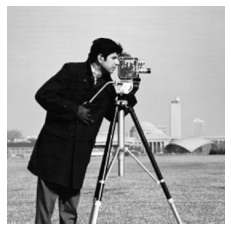

Grey image shape:  (320, 320)


In [2]:
# read image
img = plt.imread('cameraman.jpg')
# print original image shape
print("Original image shape: ", img.shape)
# convert three-dimensional image channels to single grey channel
grey_img_2d = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# normalize image values between 0 and 1
grey_img = grey_img_2d / 255
# clipping image values
np.clip(grey_img, 0, 1, out=grey_img)
# plot grey-scaled image
print("Grey-scaled image:")
plt.imshow(grey_img, cmap='Greys_r', vmin=0, vmax=1)
plt.axis("off")
plt.show()
# print shape of grey-scaled image
print("Grey image shape: ", grey_img.shape)

### 1.2 Fundamental Image DFT & IDFT Pipeline

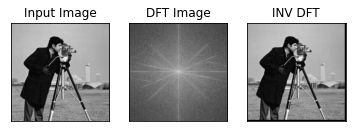

In [3]:
# zero padding for kernel new_size = (size_dimI_image + size_dimI_kernel) - 1, for each dimension I
grey_img_pad = np.pad(grey_img , [(0, 4), (0, 4)], mode='constant')
# Discrete Fourier Transformation
fourier_image = np.fft.fft2(grey_img_pad)
# shift to center DFT-image
fshift_image = np.fft.fftshift(fourier_image)
# compute magnitude spectrum
magnitude_spectrum_image = 20*np.log(np.abs(fshift_image))
# inverse Discrete Fourier Transformation
image_back = np.fft.ifft2(fshift_image)

# plot computed DFT pipeline images
plt.subplot(131),plt.imshow(grey_img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(magnitude_spectrum_image, cmap = 'gray')
plt.title('DFT Image'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(np.abs(image_back), cmap = 'gray')
plt.title('INV DFT'), plt.xticks([]), plt.yticks([])
plt.show()

### 1.3 DTF & IDFT Filtered Image Computation

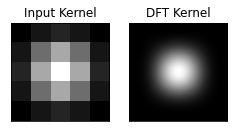

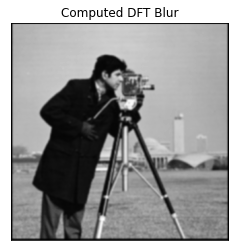

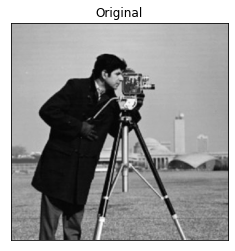

In [4]:
# gaussian 5x5 kernel
kernel_gaussian_5x5 = np.array([[1 / 256, 4  / 256,  6 / 256,  4 / 256, 1 / 256],
                               [4 / 256, 16 / 256, 24 / 256, 16 / 256, 4 / 256],
                               [6 / 256, 24 / 256, 36 / 256, 24 / 256, 6 / 256],
                               [4 / 256, 16 / 256, 24 / 256, 16 / 256, 4 / 256],
                               [1 / 256, 4  / 256,  6 / 256,  4 / 256, 1 / 256]])

# plot Gaussian kernel
plt.subplot(131),plt.imshow(kernel_gaussian_5x5, cmap = 'gray')
plt.title('Input Kernel'), plt.xticks([]), plt.yticks([])

# zero padding for kernel new_size = (size_dimI_image + size_dimI_kernel) - 1, for each dimension I
kernel_gaussian_5x5 = np.pad(kernel_gaussian_5x5 , [(0, 319), (0, 319)], mode='constant')

fourier_kernel = np.fft.fft2(kernel_gaussian_5x5)
fshift_kernel = np.fft.fftshift(fourier_kernel)

# compute blur image
blur_image = np.fft.ifft2(fshift_image * fshift_kernel)

# plot results
plt.subplot(132),plt.imshow(np.abs(fshift_kernel), cmap = 'gray')
plt.title('DFT Kernel'), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(np.abs(blur_image), cmap = 'gray')
plt.title('Computed DFT Blur'), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(grey_img, cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.show()

## 2.Trigonometry

**Description:** <br>
Extract magnitude and phase from images for image reconstruction tasks.

### 2.1 Precomputation

In [5]:
# compute shifted 2D DFT image from greyscaled cameraman image
dft_cameraman = np.fft.fftshift(np.fft.fft2(grey_img_pad)) 

### 2.2 Magnitude

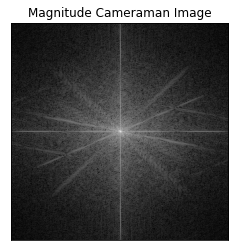

In [6]:
# compute magnitude form DFT cameraman image 
mag_cameraman = np.log(1+np.abs(dft_cameraman))

# plot magnitude
plt.imshow(mag_cameraman, cmap = 'gray')
plt.title('Magnitude Cameraman Image'), plt.xticks([]), plt.yticks([])
plt.show()

### 2.3 Phase

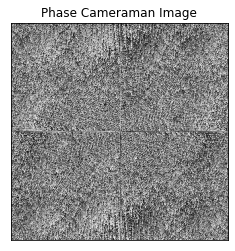

In [7]:
# compute phase from DFT cameraman image
phase_cameraman = np.angle(dft_cameraman)

# plot phase 
plt.imshow(phase_cameraman, cmap = 'gray')
plt.title('Phase Cameraman Image'), plt.xticks([]), plt.yticks([])
plt.show()

### 2.4 Image Reconstruction Phase & Magnitude

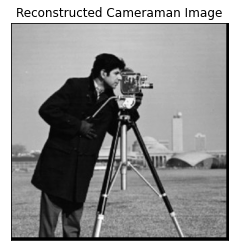

In [8]:
# reconstruct DFT cameraman image with magnitude & phase
recon_cameraman = np.multiply(np.abs(dft_cameraman), np.exp(phase_cameraman*1j))
# compute IDFT of reconstructed DFT cameraman image
idft_recon_cameraman = np.fft.ifft2(recon_cameraman)

# plot reconstructed camerman image
plt.imshow(np.abs(idft_recon_cameraman), cmap = 'gray')
plt.title('Reconstructed Cameraman Image'), plt.xticks([]), plt.yticks([])
plt.show()

### 2.5 Magnitude vs. Phase - Student Exercise

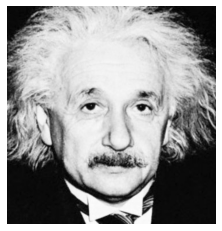

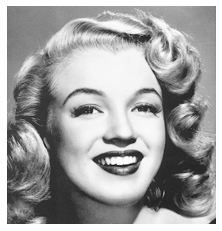

In [9]:
# read Einstein image - preprocessed name: einstein_img_2d
einstein_img = plt.imread('einstein.png')
einstein_img_2d = cv2.cvtColor(einstein_img, cv2.COLOR_BGR2GRAY)
plt.imshow(einstein_img_2d, cmap='Greys_r', vmin=0, vmax=1)
plt.axis("off")
plt.show()

# read Marilyn image - preprocessed name: marilyn_img_2d
marilyn_img = plt.imread('marilyn.png')
marilyn_img_2d = cv2.cvtColor(marilyn_img, cv2.COLOR_BGR2GRAY)
plt.imshow(marilyn_img_2d, cmap='Greys_r', vmin=0, vmax=1)
plt.axis("off")
plt.show()

In [10]:
########## Student Exercise ##########
# compute DFT Einstein image (hint: tranform & shift)
dft_einstein = np.fft.fftshift(np.fft.fft2(einstein_img_2d)) #TODO Student

# compute magnitude of DFT Einstein image (hint: check np.abs())
mag_einstein = np.abs(dft_einstein) #TODO Student

# compute phase of DFT Einstein image (hint: check np.angle())
phase_einstein = np.angle(dft_einstein) #TODO Student

# compute DFT Marilyn image (hint: tranform & shift)
dft_marilyn = np.fft.fftshift(np.fft.fft2(marilyn_img_2d)) #TODO Student

# compute magnitude of DFT Einstein image (hint: check np.abs())
mag_marilyn = np.abs(dft_marilyn) #TODO Student

# compute phase of DFT Einstein image (hint: check np.angle())
phase_marilyn = np.angle(dft_marilyn) #TODO Student

# reconstruct image with magnitude from marilyn & phase from einstein
dft_mp_1 = np.multiply(mag_marilyn, np.exp(phase_einstein*1j)) #TODO Student
# compute IDFT from reconstructed image above
idft_mp_1 = np.fft.ifft2(dft_mp_1) #TODO Student
plt.imshow(np.abs(idft_mp_1), cmap = 'gray')
plt.title('Magnitude: Marilyn | Phase: Einstein'), plt.xticks([]), plt.yticks([])
plt.show()

# reconstruct image with magnitude from einstein & phase from marilyn
dft_mp_2 =#TODO Student
# compute IDFT from reconstructed image above
idft_mp_2 =#TODO Student
plt.imshow(np.abs(idft_mp_2), cmap = 'gray')
plt.title('Magnitude: Einstein | Phase: Marilyn'), plt.xticks([]), plt.yticks([])
plt.show()
print("Question: Which component has more impact on computed images (magnitude or phase)?")

########## Student Exercise ##########

SyntaxError: invalid syntax (Temp/ipykernel_4780/1758064835.py, line 3)

## 3. Performance Comparison Image Filter Pipeline & DFT Pipeline

**Description:** <br>
Compare performance of DFT Pipeline based on computation time with basic kernel image filtering method. 

### 3.1 Neutral Kernel Defintion

In [11]:
# define neutral kernel for comparison
large_kernel = np.zeros((5,5))
large_kernel[2,2] = 1

### 3.2 Performance Kernel DFT Computation

In [12]:
def dft2D(img, kernel):
    start = time.time()
    img = np.pad(img , [(0, 4), (0, 4)], mode='constant')
    fourier_img = np.fft.fft2(img)
    # shift to center DFT-image
    fshift_img = np.fft.fftshift(fourier_img)
    
    kernel = np.pad(kernel , [(0, 319), (0, 319)], mode='constant')
    
    fourier_kernel_img = np.fft.fft2(kernel)
    fshift_kernel_img = np.fft.fftshift(fourier_kernel_img)

    # compute blur image
    blur_img = np.fft.ifft2(fshift_img * fshift_kernel_img)
    end = time.time()
    print("Duration Time DFT Image:", end-start, "seconds")

    return blur_img

Duration Time DFT Image: 0.016000747680664062 seconds


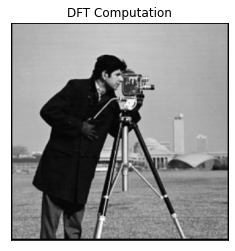

In [13]:
plt.imshow(np.abs(dft2D(grey_img, large_kernel)), cmap = 'gray')
plt.title('DFT Computation'), plt.xticks([]), plt.yticks([])
plt.show()

### 3.3 Performance Image Filtering Computation

In [14]:
def filtImg(img, kernel):
    start = time.time()
    mask = kernel
    filteredImg = np.zeros((len(img),len(img[0])))
    # iterate through rows of 2D-image
    for i in range(len(img)):
        # iterate through columns of 2D-image
        for j in range(len(img[i])):
            if i>1 and i < len(img)-2 and j>1 and j<len(img[i])-2:
                filteredImg[i,j] = img[i-2, j-2]*mask[0,0] + img[i-2, j-1]*mask[0,1] + img[i-2,j]*mask[0,2] + img[i-2,j+1]*mask[0,3] + img[i-2,j+2]*mask[0,4] \
                                + img[i-1, j-2]*mask[1,0] + img[i-1, j-1]*mask[1,1] + img[i-1,j]*mask[1,2] + img[i-1,j+1]*mask[1,3] + img[i-1,j+2]*mask[1,4] \
                                + img[i, j-2]*mask[2,0] + img[i, j-1]*mask[2,1] + img[i,j]*mask[2,2] + img[i,j+1]*mask[2,3] + img[i,j+2]*mask[2,4] \
                                + img[i+1, j-2]*mask[3,0] + img[i+1, j-1]*mask[3,1] + img[i+1,j]*mask[3,2] + img[i+1,j+1]*mask[3,3] + img[i+1,j+2]*mask[3,4] \
                                + img[i+2, j-2]*mask[4,0] + img[i+2, j-1]*mask[4,1] + img[i+2,j]*mask[4,2] + img[i+2,j+1]*mask[4,3] + img[i+2,j+2]*mask[4,4]
    
    end = time.time()
    print("Duration Time Image filtering:", end-start, "seconds")
    
    return filteredImg

Duration Time Image filtering: 1.2661018371582031 seconds


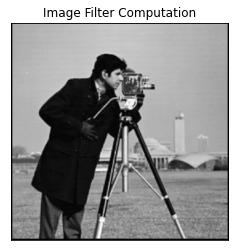

In [15]:
plt.imshow(filtImg(grey_img, large_kernel), cmap = 'gray')
plt.title('Image Filter Computation'), plt.xticks([]), plt.yticks([])
plt.show()

## 4. Hybrid Images

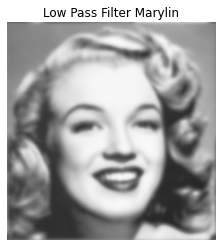

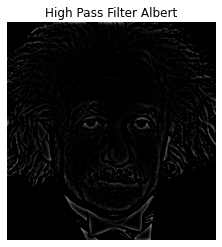

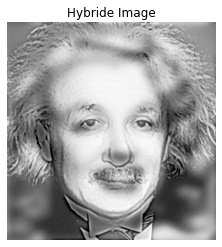

In [16]:
# numRows = number of rows image, numCols = number of columns image, sigma = computation weight, highPass = Boolen for highPass or lowPass computation
def makeGaussianFilter(numRows, numCols, sigma, highPass=True):
    centerI = int(numRows/2) + 1 if numRows % 2 == 1 else int(numRows/2)
    centerJ = int(numCols/2) + 1 if numCols % 2 == 1 else int(numCols/2)
 
    def gaussian(i,j):
        coefficient = math.exp(-1.0 * ((i - centerI)**2 + (j - centerJ)**2) / (2 * sigma**2))
        return 1 - coefficient if highPass else coefficient
 
    return np.array([[gaussian(i,j) for j in range(numCols)] for i in range(numRows)])

# DFT-Pipeline for Kernel Computation
def filterDFT(imageMatrix, filterMatrix): 
    shiftedDFT = np.fft.fftshift(np.fft.fft2(imageMatrix))
    filteredDFT = shiftedDFT * filterMatrix
    return np.fft.ifft2(np.fft.ifftshift(filteredDFT))

# computation low pass image
def lowPass(imageMatrix, sigma):
    n,m = imageMatrix.shape
    return filterDFT(imageMatrix, makeGaussianFilter(n, m, sigma, highPass=False))

# computation high pass image
def highPass(imageMatrix, sigma):
    n,m = imageMatrix.shape
    return filterDFT(imageMatrix, makeGaussianFilter(n, m, sigma, highPass=True))

# combine high pass image with low pass image
def hybridImage(highFreqImg, lowFreqImg, sigmaHigh, sigmaLow):
    highPassed = highPass(highFreqImg, sigmaHigh)
    lowPassed = lowPass(lowFreqImg, sigmaLow)
 
    return highPassed + lowPassed

# compute low pass filter image
marilyn = plt.imread("marilyn.png")
marilyn = cv2.cvtColor(marilyn, cv2.COLOR_BGR2GRAY)
lowPassedMarilyn = lowPass(marilyn, 20)
plt.title('Low Pass Filter Marylin')
plt.imshow(np.real(lowPassedMarilyn), cmap='Greys_r', vmin=0, vmax=1)
plt.axis("off")
plt.show()

# compute high pass filter image
einstein = plt.imread("einstein.png")
einstein = cv2.cvtColor(einstein, cv2.COLOR_BGR2GRAY)
highPassedEinstein = highPass(einstein, 20)
plt.title('High Pass Filter Albert')
plt.imshow(np.real(highPassedEinstein), cmap='Greys_r', vmin=0, vmax=1)
plt.axis("off")
plt.show()

# compute hybride image
hybrid = hybridImage(highPassedEinstein,lowPassedMarilyn, 5, 10)
plt.title('Hybrid Image')
plt.imshow(np.real(hybrid), cmap='Greys_r', vmin=0, vmax=1)
plt.axis("off")
plt.show()
# source: https://jeremykun.com/2014/09/29/hybrid-images/